In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import matplotlib.dates as mdates

In [2]:
import matplotlib.dates as mdates

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_oli = xr.open_dataset('../data/model/oliktok.nc')
data_ascos = xr.open_dataset('../data/model/ascos.nc')
data_greenland = xr.open_dataset('../data/model/summit.nc')

In [5]:
oli_obs = xr.open_dataset('../data/obs/OLI/olimwrret2turnM1.c1.20170512.000002.nc')
ascos_obs = xr.open_dataset('../data/obs/ASCOS/ascmwrlosC1.b1.20080831.000207.cdf')
greenland_obs = xr.open_dataset('../data/obs/SMT/smtmwrlosX1.a1.20190702.011127.cdf.nc')

In [6]:
dn0 = data_oli.DN0
lwp_oli = ((data_oli.RCP + data_oli.RDP + data_oli.RRP) * dn0).integrate('z').load() * 1e3

In [7]:
dn0 = data_ascos.DN0
lwp_ascos = ((data_ascos.RCP + data_ascos.RDP + data_ascos.RRP) * dn0).integrate('z').load() * 1e3

In [8]:
dn0 = data_greenland.DN0
lwp_greenland = ((data_greenland.RCP + data_greenland.RDP + data_greenland.RRP) * dn0).integrate('z').load() * 1e3

In [9]:
obs_lwp_oli = oli_obs['phys_lwp']
obs_lwp_ascos = ascos_obs['liquid']
obs_lwp_greenland = greenland_obs['lwp'].where(greenland_obs['lwp'] != -999.0)

In [10]:
from datetime import datetime, timezone
t_oli = datetime(2017,5,12,9,tzinfo=timezone.utc)
t_ascos = datetime(2008,8,31,6,tzinfo=timezone.utc)
t_smt = datetime(2019,7,2,6,tzinfo=timezone.utc)
t = [t_oli, t_ascos, t_smt]

In [11]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

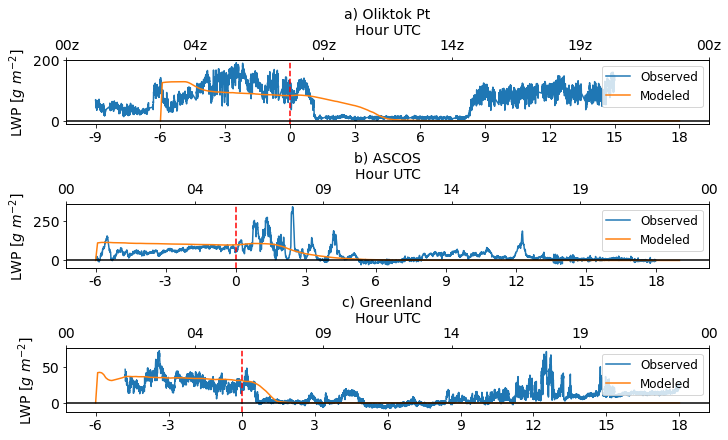

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,6), constrained_layout=True)
obs_lwp_oli.plot(ax=ax1, label='Observed')
lwp_oli.plot(ax=ax1, label='Modeled')

ticklabels = (np.asarray(mdates.num2date(ax1.get_xticks())) - t_oli).astype('timedelta64[h]').astype(int)

ax1.legend(loc='upper right')
ax1.set_title("a) Oliktok Pt")
ax1.set_xticklabels(ticklabels, rotation=0, ha='center')
ax1b = ax1.twiny()
ax1b.xaxis.set_major_formatter(mdates.DateFormatter('%Hz'))
ax1b.set_xlabel("Hour UTC")
ax1.set_ylabel('LWP [$g\ m^{-2}$]')
ax1.axvline(lwp_oli.time[0].values + np.timedelta64(6,'h'), color='r', linestyle='dashed')
ax1.set_xlabel("")
ax1.axhline(0, color='k')


obs_lwp_ascos.plot(ax=ax2, label='Observed')
lwp_ascos.plot(ax=ax2, label='Modeled')

ticklabels = (np.asarray(mdates.num2date(ax2.get_xticks())) - t_ascos).astype('timedelta64[h]').astype(int)

ax2.legend(loc='upper right')
ax2.set_title("b) ASCOS")
ax2.set_xticklabels(ticklabels, rotation=0, ha='center')
ax2b = ax2.twiny()
ax2b.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax2b.set_xlabel("Hour UTC")
ax2.set_ylabel('LWP [$g\ m^{-2}$]')
ax2.axvline(lwp_ascos.time[0].values + np.timedelta64(6,'h'), color='r', linestyle='dashed')
ax2.set_xlabel("")
ax2.axhline(0, color='k')

obs_lwp_greenland.plot(ax=ax3, label='Observed')
lwp_greenland.plot(ax=ax3, label='Modeled')

ticklabels = (np.asarray(mdates.num2date(ax3.get_xticks())) - t_smt).astype('timedelta64[h]').astype(int)

ax3.legend(loc='upper right')
ax3.set_title("c) Greenland")
ax3.set_xticklabels(ticklabels, rotation=0, ha='center')
ax3b = ax3.twiny()
ax3b.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax3b.set_xlabel("Hour UTC")
ax3.set_ylabel('LWP [$g\ m^{-2}$]')
ax3.axvline(lwp_greenland.time[0].values + np.timedelta64(6,'h'), color='r', linestyle='dashed')
ax3.set_xlabel("")
ax3.axhline(0, color='k')

# plt.savefig('lwp_combined.pdf', facecolor='w')

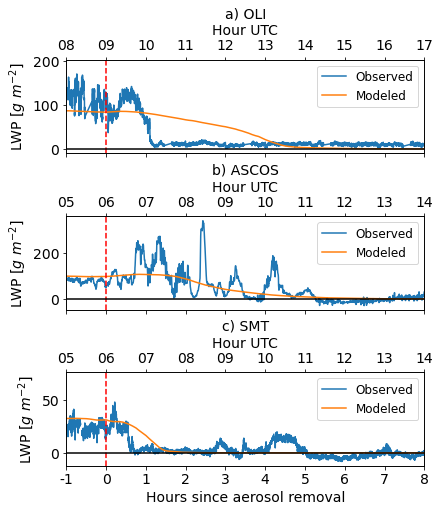

In [17]:
oli_t1 = np.datetime64(lwp_oli.time[0].values + np.timedelta64(5, 'h'))
oli_t2 = oli_t1 + np.timedelta64(9, 'h')

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,7), constrained_layout=True)
obs_lwp_oli.plot(ax=ax1, label='Observed')
lwp_oli.plot(ax=ax1, label='Modeled')
ax1.set_xlim(oli_t1, oli_t2)

ticklabels = (np.asarray(mdates.num2date(ax1.get_xticks())) - t_oli).astype('timedelta64[h]').astype(int)

ax1.legend(loc='upper right')
ax1.set_title("a) OLI")
ax1.set_xticklabels([""], rotation=0, ha='center')
ax1b = ax1.twiny()
ax1b.set_xlim(oli_t1, oli_t2)
ax1b.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax1b.set_xlabel("Hour UTC")
# ax1b.set_xlabel("Time [UTC]")
ax1.set_ylabel('LWP [$g\ m^{-2}$]')
ax1.axvline(lwp_oli.time[0].values + np.timedelta64(6,'h'), color='r', linestyle='dashed')
ax1.set_xlabel("")
ax1.axhline(0, color='k')
# ax1.set_xlabel("Hours since aerosol removal")

ascos_t1 = np.datetime64(lwp_ascos.time[0].values + np.timedelta64(5, 'h'))
ascos_t2 = ascos_t1 + np.timedelta64(9, 'h')

obs_lwp_ascos.plot(ax=ax2, label='Observed')
lwp_ascos.plot(ax=ax2, label='Modeled')
ax2.set_xlim(ascos_t1, ascos_t2)
ticklabels = (np.asarray(mdates.num2date(ax2.get_xticks())) - t_ascos).astype('timedelta64[h]').astype(int)

ax2.legend(loc='upper right')
ax2.set_title("b) ASCOS")
ax2.set_xticklabels([""], rotation=0, ha='center')
ax2b = ax2.twiny()
ax2b.set_xlim(ascos_t1, ascos_t2)
ax2b.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax2b.set_xlabel("Hour UTC")
# ax2b.set_xticklabels([""])
ax2.set_ylabel('LWP [$g\ m^{-2}$]')
ax2.axvline(lwp_ascos.time[0].values + np.timedelta64(6,'h'), color='r', linestyle='dashed')
ax2.set_xlabel("")
ax2.axhline(0, color='k')
# ax2.set_xlabel("Hours since aerosol removal")

greenland_t1 = np.datetime64(lwp_greenland.time[0].values + np.timedelta64(5, 'h'))
greenland_t2 = greenland_t1 + np.timedelta64(9, 'h')

obs_lwp_greenland.plot(ax=ax3, label='Observed')
lwp_greenland.plot(ax=ax3, label='Modeled')
ax3b = ax3.twiny()
ax3b.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax3b.set_xlabel("Hour UTC")

ax3.set_xlim(greenland_t1, greenland_t2)
ax3b.set_xlim(greenland_t1, greenland_t2)
ticklabels = (np.asarray(mdates.num2date(ax3.get_xticks())) - t_smt).astype('timedelta64[h]').astype(int)

ax3.legend(loc='upper right')
ax3.set_title("c) SMT")
ax3.set_xticklabels(ticklabels, rotation=0, ha='center')
# ax3b.set_xticklabels([""])
ax3.set_ylabel('LWP [$g\ m^{-2}$]')
ax3.axvline(lwp_greenland.time[0].values + np.timedelta64(6,'h'), color='r', linestyle='dashed')
ax3.set_xlabel("")
ax3.axhline(0, color='k')
ax3.set_xlabel("Hours since aerosol removal")


plt.savefig('fig06.pdf', facecolor='w')